<a href="https://colab.research.google.com/github/giovanimachado/phd-puc/blob/main/computacao-evolucionaria/Aula13_exercicio4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

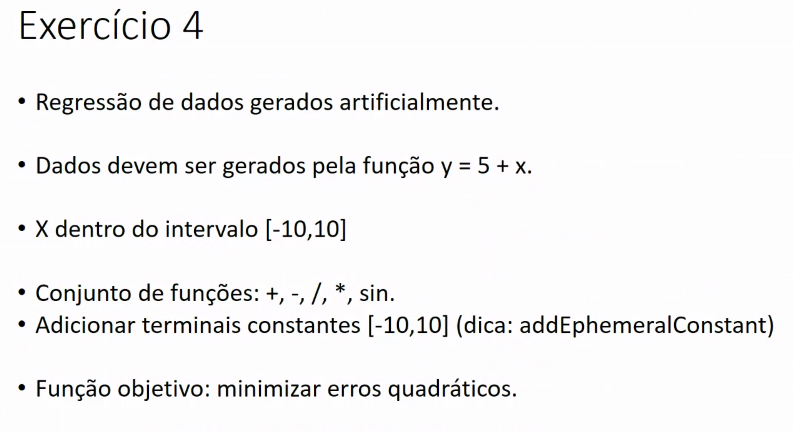

# Gerar dados artificialmente

In [3]:
import numpy as np

In [4]:
def funcao(x):
  y = 5 + x
  return y

In [5]:
x = np.arange(-10, 10, 0.1)
x = x.tolist()
x

[-10.0,
 -9.9,
 -9.8,
 -9.700000000000001,
 -9.600000000000001,
 -9.500000000000002,
 -9.400000000000002,
 -9.300000000000002,
 -9.200000000000003,
 -9.100000000000003,
 -9.000000000000004,
 -8.900000000000004,
 -8.800000000000004,
 -8.700000000000005,
 -8.600000000000005,
 -8.500000000000005,
 -8.400000000000006,
 -8.300000000000006,
 -8.200000000000006,
 -8.100000000000007,
 -8.000000000000007,
 -7.9000000000000075,
 -7.800000000000008,
 -7.700000000000008,
 -7.6000000000000085,
 -7.500000000000009,
 -7.400000000000009,
 -7.30000000000001,
 -7.20000000000001,
 -7.10000000000001,
 -7.000000000000011,
 -6.900000000000011,
 -6.800000000000011,
 -6.700000000000012,
 -6.600000000000012,
 -6.500000000000012,
 -6.400000000000013,
 -6.300000000000013,
 -6.2000000000000135,
 -6.100000000000014,
 -6.000000000000014,
 -5.900000000000015,
 -5.800000000000015,
 -5.700000000000015,
 -5.600000000000016,
 -5.500000000000016,
 -5.400000000000016,
 -5.300000000000017,
 -5.200000000000017,
 -5.10000000

In [6]:
y=[]
for i in x:
  y.append(funcao(i))
y

[-5.0,
 -4.9,
 -4.800000000000001,
 -4.700000000000001,
 -4.600000000000001,
 -4.500000000000002,
 -4.400000000000002,
 -4.3000000000000025,
 -4.200000000000003,
 -4.100000000000003,
 -4.0000000000000036,
 -3.900000000000004,
 -3.8000000000000043,
 -3.7000000000000046,
 -3.600000000000005,
 -3.5000000000000053,
 -3.4000000000000057,
 -3.300000000000006,
 -3.2000000000000064,
 -3.1000000000000068,
 -3.000000000000007,
 -2.9000000000000075,
 -2.800000000000008,
 -2.700000000000008,
 -2.6000000000000085,
 -2.500000000000009,
 -2.4000000000000092,
 -2.3000000000000096,
 -2.20000000000001,
 -2.1000000000000103,
 -2.0000000000000107,
 -1.900000000000011,
 -1.8000000000000114,
 -1.7000000000000117,
 -1.600000000000012,
 -1.5000000000000124,
 -1.4000000000000128,
 -1.3000000000000131,
 -1.2000000000000135,
 -1.1000000000000139,
 -1.0000000000000142,
 -0.9000000000000146,
 -0.8000000000000149,
 -0.7000000000000153,
 -0.6000000000000156,
 -0.500000000000016,
 -0.40000000000001634,
 -0.3000000000

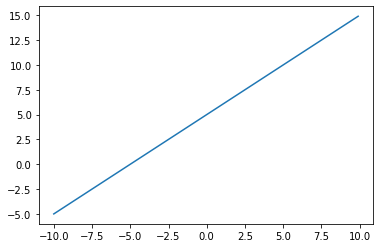

In [7]:
import matplotlib.pyplot as plt
plt.plot(x, y);

#GP

In [8]:
!pip install deap

     |████████████████████████████████| 163kB 5.3MB/s 


In [9]:
# Importar bibliotecas
import operator
import math
import random
from deap import algorithms
from deap import base
from deap import creator
from deap import tools
from deap import gp

In [14]:
# Definir funções

def protectedDiv(left, right):
    try:
        return left / right
    except ZeroDivisionError:
        return 1

pset = gp.PrimitiveSet("MAIN", 1)   # nome do procedimento a ser gerado e o número de argumentos
pset.addPrimitive(operator.add, 2)  # funções e o número de argumentos
pset.addPrimitive(operator.sub, 2)
pset.addPrimitive(operator.mul, 2)
pset.addPrimitive(protectedDiv, 2)
pset.addPrimitive(np.sin, 1) # adicionado o seno
pset.addEphemeralConstant("rand101", lambda: random.randint(-10,10))

In [17]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))                     # Minimização do erro
creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMin)      # indivíduo

In [18]:
toolbox = base.Toolbox()
toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=1, max_=2)                  # metade genfull (toda folha tem a mesma profundidade entre min e max) metade genGrow (folhas podem ter profundidades diferente entre min e max).
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.expr)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)
toolbox.register("compile", gp.compile, pset=pset)

In [19]:
# Função de avaliação
def evaluation(individual):
    # Transforma a expressão em árvore em uma função que pode ser chamada
    func = toolbox.compile(expr=individual)
    # Avalia o erro (MSE) entre a expressão gerada e o resultado real da função
    error = 0
    for idx, point in enumerate(x):
      error += (func(point) - y[idx])**2 
    return error,

In [20]:
# operadores
toolbox.register("evaluate", evaluation)                          # avaliação
toolbox.register("select", tools.selTournament, tournsize=3)      # seleção
toolbox.register("mate", gp.cxOnePoint)                           # crossover
toolbox.register("expr_mut", gp.genFull, min_=0, max_=2)          
toolbox.register("mutate", gp.mutUniform, expr=toolbox.expr_mut, pset=pset)

toolbox.decorate("mate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))     #limites para crossover
toolbox.decorate("mutate", gp.staticLimit(key=operator.attrgetter("height"), max_value=17))   # limites para mutação

In [21]:
random.seed(1)

pop = toolbox.population(n=300)
hof = tools.HallOfFame(1)

pop, log = algorithms.eaSimple(pop, toolbox, 0.5, 0.1, 40,  halloffame=hof, verbose=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in double_scalars
  """


In [22]:
# Função encontrada
for i in hof:
  print(i)

add(sub(7, -3), sub(ARG0, 5))


In [23]:
# compila função para testarmos
gp_func = toolbox.compile(expr=hof[0])

In [24]:
# calcula y pela função gerada pelo gp
y_hat=[]
for i in x:
  y_hat.append(gp_func(i))
y_hat

[-5.0,
 -4.9,
 -4.800000000000001,
 -4.700000000000001,
 -4.600000000000001,
 -4.500000000000002,
 -4.400000000000002,
 -4.3000000000000025,
 -4.200000000000003,
 -4.100000000000003,
 -4.0000000000000036,
 -3.900000000000004,
 -3.8000000000000043,
 -3.7000000000000046,
 -3.600000000000005,
 -3.5000000000000053,
 -3.4000000000000057,
 -3.300000000000006,
 -3.2000000000000064,
 -3.1000000000000068,
 -3.000000000000007,
 -2.9000000000000075,
 -2.800000000000008,
 -2.700000000000008,
 -2.6000000000000085,
 -2.500000000000009,
 -2.4000000000000092,
 -2.3000000000000096,
 -2.20000000000001,
 -2.1000000000000103,
 -2.0000000000000107,
 -1.900000000000011,
 -1.8000000000000114,
 -1.7000000000000117,
 -1.600000000000012,
 -1.5000000000000124,
 -1.4000000000000128,
 -1.3000000000000131,
 -1.2000000000000135,
 -1.1000000000000139,
 -1.0000000000000142,
 -0.9000000000000146,
 -0.8000000000000149,
 -0.7000000000000153,
 -0.6000000000000156,
 -0.500000000000016,
 -0.40000000000001634,
 -0.3000000000

In [25]:
# calcula o erro quadrático
error = 0
for idx, point in enumerate(x):
  error += (gp_func(point) - y[idx])**2
error

0.0

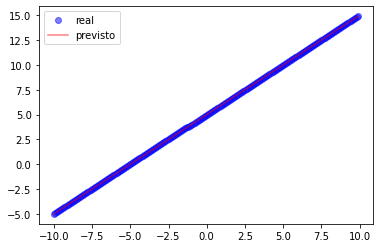

In [26]:
# plota a comparação
plt.plot(x, y, 'bo', label = 'real', color = 'blue', alpha =0.5);
plt.plot(x, y_hat, label = 'previsto', color= 'red', alpha = 0.5);
plt.legend();